In [11]:
import requests, bs4, csv, timeit, datetime
import pandas as pd

#Datetime to change the date to a datetime
from datetime import date

import numpy as np
# Imports of matplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set(rc={'figure.figsize':(10,10)})

### Indlæsning af "Forumindex" dataframe:

In [13]:
indexdf = pd.read_csv('Pokernet_forumindex.csv')


In [14]:
#Function to find a specific cell based on a column and row
#indexdf["date_created"].iloc[0]

### Dataformatering af dataframet:

In [15]:
#changes date_created and date_edited to datetime type
indexdf["date_created"] = pd.to_datetime(indexdf["date_created"], dayfirst=True)
indexdf["date_edited"] = pd.to_datetime(indexdf["date_edited"], dayfirst=True)
indexdf["comments"] = indexdf["comments"].astype("int64")
indexdf["views"] = indexdf["views"].astype("int64")
indexdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42197 entries, 0 to 42196
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         42196 non-null  object        
 1   date_created  42197 non-null  datetime64[ns]
 2   OP            42197 non-null  object        
 3   comments      42197 non-null  int64         
 4   views         42197 non-null  int64         
 5   date_edited   42197 non-null  datetime64[ns]
 6   last_user     42197 non-null  object        
 7   link          42197 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 2.6+ MB


### Deskreptiv statistik af index:

In [16]:

indexdf.loc[indexdf["title"] == "220V stik i USA?"] # <---- første rigtige Off-Topic opslag
indexdf = indexdf.loc[indexdf["date_created"] > "2008-01-01"] # <---- Her begynder off-topic at være hovedsageligt off-topic fremfor bad beats
indexdf["title"].count()

33351

In [7]:
thread_start_df = indexdf.loc[indexdf["date_created"] >= "04-12-2018"]
thread_start_df = thread_start_df.loc[thread_start_df["comments"] >= 13]
thread_start_df = thread_start_df.loc[thread_start_df["comments"] <= 1000]
thread_start_df

threads_started = pd.DataFrame(thread_start_df["OP"].value_counts()).reset_index()
threads_started.columns=["user", "threads started"]
threads_started.head(30)


,user,threads started
0,Newtood,35
1,All-Out-Put,25
2,cains,21
3,Rambam,19
4,Henze05,17
5,tuznelda,17
6,nafudoma,16
7,Bridgeking,15
8,Holstt,15
9,MeowImQh,14


In [8]:
#Outliers:
df_comm_outlier = indexdf.loc[indexdf["comments"] < 1000]
df_views_outlier = indexdf.loc[indexdf["views"] < 100000]

In [17]:
#find outlies med denne funktion

year4df = indexdf.loc[indexdf["date_created"] >= "04-12-2018"]
#year4df = year4df.loc[year4df["comments"] >= 13]
#year4df = year4df.loc[year4df["comments"] < 1000]
indexdf["comments"].corr(indexdf["views"])

#year4df.describe()
#year4df["title"].nunique()
sorted_inplace = year4df.sort_values(by="comments", ignore_index=True, ascending=False)


#df.loc[df["views"] > 100000]

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'threads')]

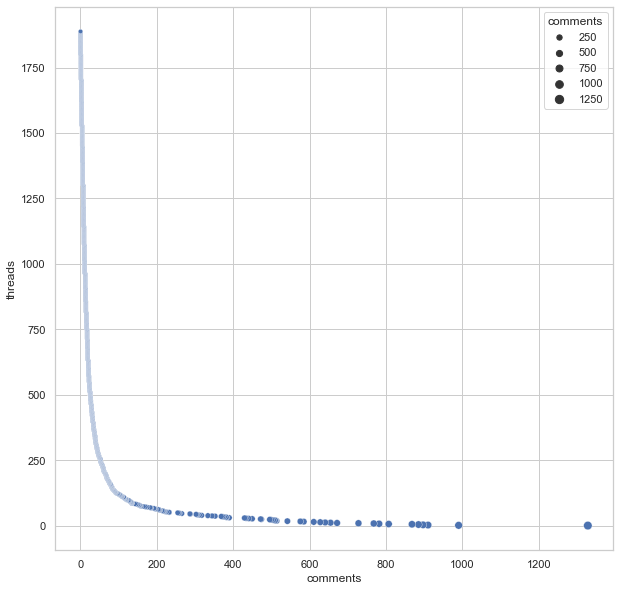

In [68]:
# Show the spread of comments per post

#sorted_year4df = year4df.sort_values(by="comments")
#sorted_index.groupby()
#sbn.countplot(x = "comments", data=sorted_year4df)
#sbn.lineplot(data=sorted_year4df, x= sorted_year4df.index, y="comments")¨

x = sorted_inplace["comments"]
y = sorted_inplace.index


sbn.set(style="whitegrid")
sbn.scatterplot(x, y, size=x).set(ylabel="threads")

#sbn.lineplot(x, y)

#semilogy

#fig, ax = plt.subplots()

#y_avg = [np.mean(x)] * len(x)
#y_med = [np.median(x)] * len(x)

#ax.plot(x ,lw = 4, label='comments per thread')
#ax.plot(y_avg, x, color='red', lw=2, label="average", linestyle="dashed")
#ax.plot(y_med, x, color="green", lw=2, label="median", linestyle="dashed")
#ax.plot([550, 0], [x.median(), x.median()],label="median")
#ax.plot([362, 0],[x.mean(), x.mean()],  color="red", label="mean")

#plt.legend(fontsize=20)
#plt.xlabel("threads")
#plt.ylabel("comments")

#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.xticks([x.median(), x.median(), 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])
#plt.show()




#sorted_inplace["comments"].barplot()
#plt.hist("comments", bins=sorted_index["comments"].value_counts)

In [ ]:

#df with a count of threads, posts and views  per year
indexdf["year_created"] = indexdf["date_created"].map(lambda x: x.year)
groupby_index = indexdf.groupby(by="year_created").agg({"title": "count", "comments":"sum", "views":"sum"}).reset_index()

C:\Users\Alexander\AppData\Local\Temp\ipykernel_7400\2970352358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indexdf["year_created"] = indexdf["date_created"].map(lambda x: x.year)


    year_created  title  comments    views
0           2008   5748     88148  7776523
1           2009   6215    105747  8564249
2           2010   4860     88420  8589123
3           2011   3708     77616  9557122
4           2012   3371     73109  9586111
5           2013   2314     57344  6164717
6           2014   1795     50534  4820057
7           2015   1374     46464  3568484
8           2016   1058     44914  2869375
9           2017    828     40352  2194427
10          2018    621     26460  1732491
11          2019    520     16743  1278100
12          2020    458     16933  1151891
13          2021    388     15975  1082172
14          2022     93      4793   261681


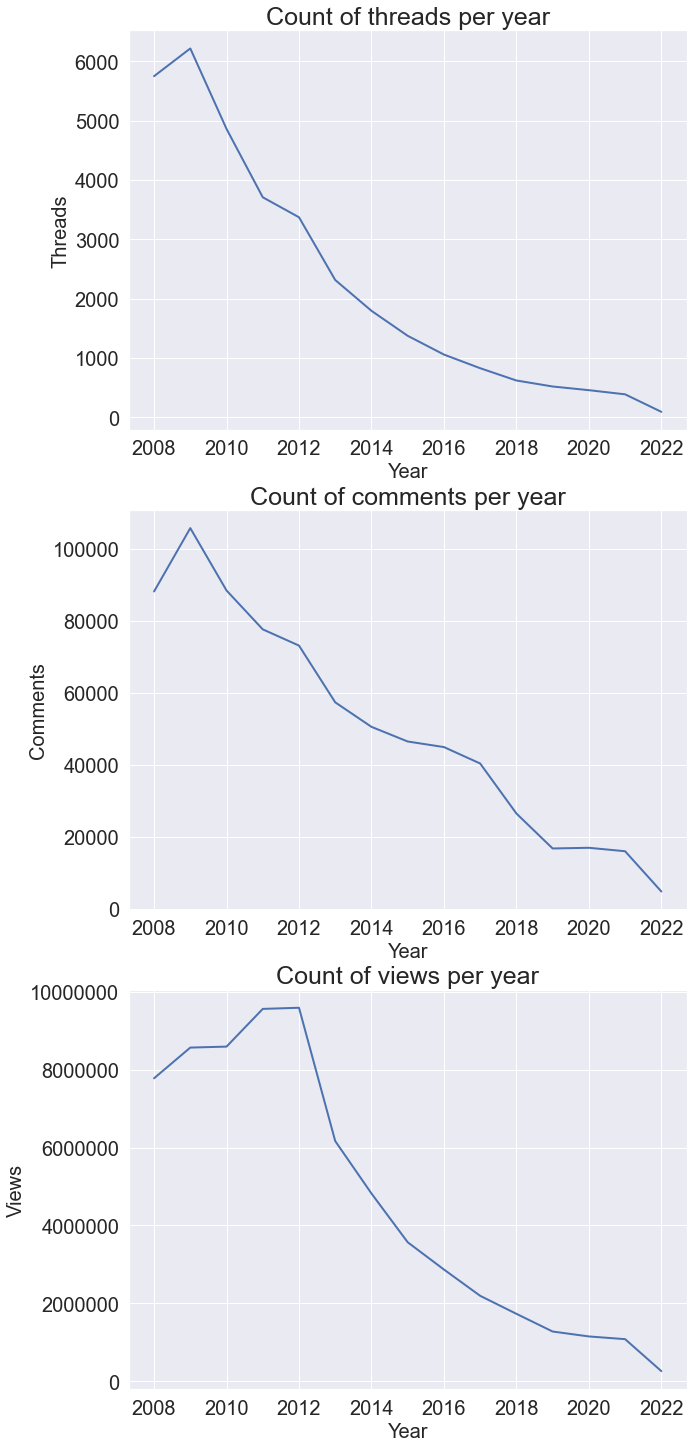

In [ ]:

print(groupby_index)
x = groupby_index["year_created"]
y = groupby_index

figure, axis = plt.subplots(3, 1, figsize=(10,25))

axis[0].plot(x, y["title"],linewidth=2)
axis[0].set_title("Count of threads per year", size=25)
axis[0].set_xlabel('Year', fontsize = 20)
axis[0].set_ylabel('Threads', fontsize = 20)
axis[0].tick_params(axis='both', which='major', labelsize=20)

axis[1].plot(x, y["comments"],linewidth=2)
axis[1].set_title("Count of comments per year", size=25)
axis[1].set_xlabel('Year', fontsize = 20)
axis[1].set_ylabel('Comments', fontsize = 20)
axis[1].tick_params(axis='both', which='major', labelsize=20)

axis[2].plot(x, y["views"],linewidth=2)
axis[2].set_title("Count of views per year", size=25)
axis[2].set_xlabel('Year', fontsize = 20)
axis[2].set_ylabel('Views', fontsize = 20)
axis[2].tick_params(axis='both', which='major', labelsize=20)

plt.ticklabel_format(style = 'plain')

plt.show()

In [ ]:
def is_tilt(a):
    


SyntaxError: unexpected EOF while parsing (2495458794.py, line 2)

In [ ]:
#indexdf["title"].str.contains("tilt")
tmp_df = indexdf
searcher = "tilt" #"V2|V3|V4|V5|V6"
tmp_df["is_tilted"] = indexdf["title"].str.contains(searcher)

tmp_df.loc[tmp_df["is_tilted"] == True]

#tiltseries.value_counts()

,title,date_created,OP,comments,views,date_edited,last_user,link,is_tilted
449,Hvad tilter jer max for tiden? (2020 final edi...,01-01-2020,doolce,807,49912,20-02-2021 09:28,grovfil,/forum/hvad-tilter-jer-max-for-tiden-2020-fina...,True
530,"Travmand tiltalt, husk navneforbud.",23-12-2020,ludvig,6,1702,24-12-2020 04:47,DarkXoiX,/forum/travmand-tiltalt-husk-navneforbud.html,True
542,Hvad tilter dig..ved dig selv i dec.. FINAL ed...,18-12-2020,totimom,11,1023,19-12-2020 12:41,NanoQ,/forum/hvad-tilter-digved-dig-selv-i-dec-final...,True
975,Hvad tilter jer max for tiden? (2019 edition),01-01-2019,doolce,990,50268,01-01-2020 12:31,GodPreben,/forum/hvad-tilter-jer-max-for-tiden-traad-6-2...,True
1286,Ballade på Nørrebro - derail væk fra tilttråd :),15-04-2019,prangstar,1328,28453,20-05-2019 13:30,Aurvandil,/forum/ballade-paa-noerrebro-derail-vaek-fra-t...,True
...,...,...,...,...,...,...,...,...,...
40114,manden der ikke kunne tilte,25-09-2006,creative,34,1569,26-09-2006 11:08,MoPe,/forum/manden-der-ikke-kunne-tilte.html,True
40471,SE tv2 nu!! anti-tilter!,27-08-2006,pureking,7,994,28-08-2006 02:24,Pokerjay,/forum/se-tv2-nu-antitilter.html,True
40546,Fulltilt Pros,21-08-2006,MeepMeep,10,1247,21-08-2006 15:02,Sølvpil,/forum/fulltilt-pros.html,True
40821,Bestilte Party Poker-ting,21-07-2006,rockrokok,5,581,21-07-2006 00:50,pw3-Juugs,/forum/bestilte-party-pokerting.html,True
